# Decision Trees with Scikit-Learn

## Load the iris dataset

In [1]:
import pandas as pd

iris = pd.read_csv('../../datasets/iris.csv', index_col=0)
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## Split the data into training and test sets

In [2]:
from sklearn.model_selection import train_test_split

X = iris.iloc[:, 0:4]
y = iris.iloc[:, 4]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
x_train.shape, x_test.shape

((120, 4), (30, 4))

## Decision Tree Classifier

In [3]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, min_samples_leaf=1, random_state=42)
model.fit(x_train, y_train)
model

DecisionTreeClassifier(max_depth=3, random_state=42)

### Make predictions on the test set

In [4]:
y_pred = model.predict(x_test)
y_pred

array(['setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'setosa'],
      dtype=object)

## Evaluate the model

In [5]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9333333333333333

In [6]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.78      0.88         9
   virginica       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



## Visualize the decision tree

[Text(0.375, 0.875, 'x[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [38, 41, 41]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 4.85\ngini = 0.5\nsamples = 82\nvalue = [0, 41, 41]'),
 Text(0.25, 0.375, 'x[3] <= 1.65\ngini = 0.093\nsamples = 41\nvalue = [0, 39, 2]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.75, 0.375, 'x[3] <= 1.7\ngini = 0.093\nsamples = 41\nvalue = [0, 2, 39]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

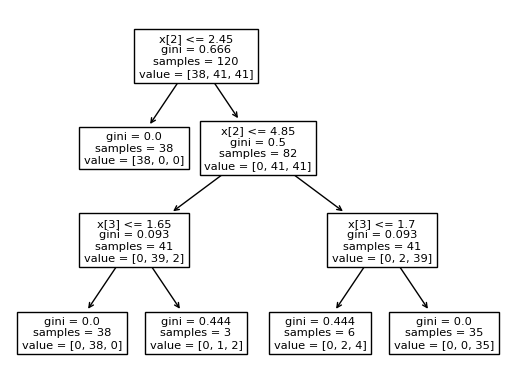

In [7]:
from sklearn import tree

tree.plot_tree(model)

## Plot the decision boundaries

C:\Users\diogo\AppData\Local\Temp\ipykernel_20404\1083488319.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\diogo\AppData\Local\Temp\ipykernel_20404\1083488319.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\diogo\AppData\Local\Temp\ipykernel_20404\1083488319.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\diogo\AppData\Local\Temp\ipykernel_20404\1083488319.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\diogo\AppData\Local\Temp\ipykernel_20404\1083488319.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\diogo\AppData\Local\Temp\ipykernel_20404\1083488319.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 

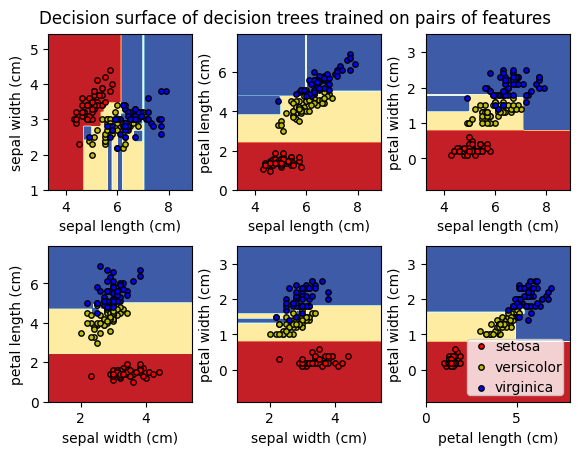

In [8]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=iris.feature_names[pair[0]],
        ylabel=iris.feature_names[pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

## Feature importances

In [9]:
model.feature_importances_

array([0.        , 0.        , 0.95247194, 0.04752806])

## Pruning

### Total impurity of leaves vs effective alphas of pruned tree

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

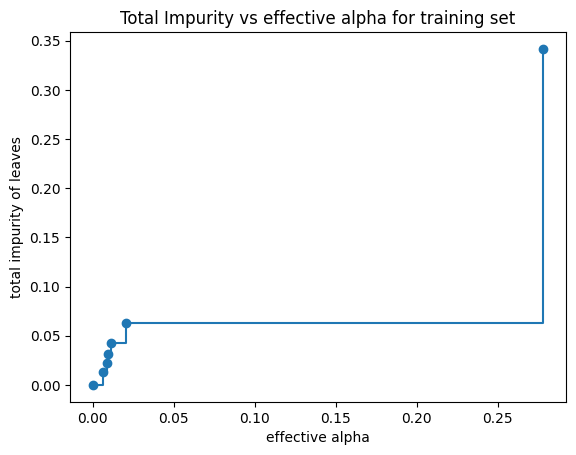

In [10]:
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [11]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.32458333333333333


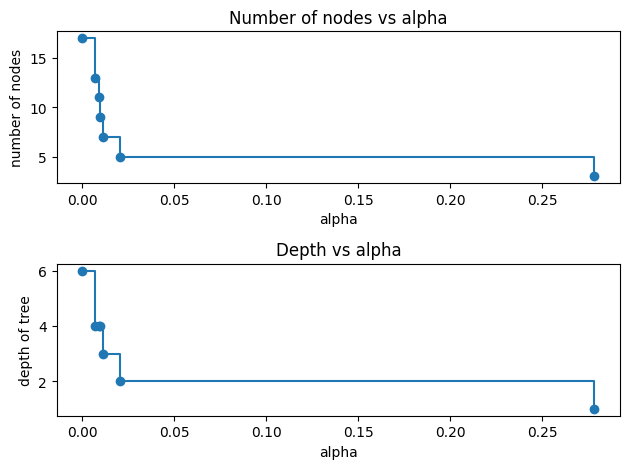

In [12]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

## Accuracy vs alpha for training and testing sets

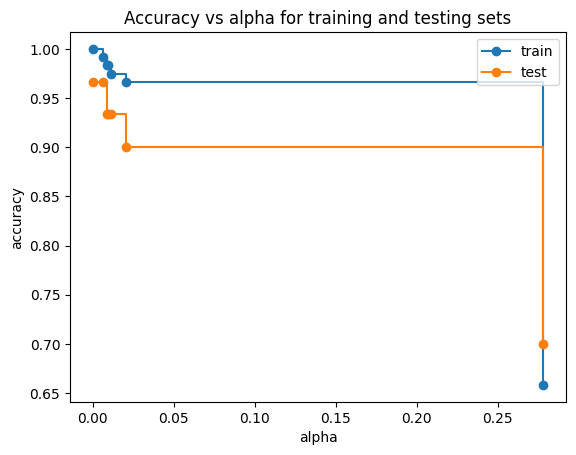

In [13]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

## The best alpha value is the one that maximizes the testing accuracy

In [22]:
pruned_model = DecisionTreeClassifier(random_state=0, ccp_alpha=0.02)
pruned_model.fit(x_train, y_train)

y_pred = pruned_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       1.00      0.78      0.88         9
   virginica       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30

